# Medições de imagem
1. Marcação (labeling)
2. Transformada Hough
    2.1 Linha Hough
    2.2 Círculo Hough
3. Detector de canto
    3.2 Detector de Canto Harris

In [1]:
import cv2 as cv
print("OpenCV: ", cv.__version__)
import numpy as np
print("numpy: ", np.__version__)
import matplotlib.pyplot as plt
plt.style.use('classic')
#%matplotlib
#%matplotlib notebook
#%matplotlib inline
%matplotlib widget
import matplotlib.patches as mpatches
from skimage.morphology  import label
from skimage.measure import regionprops
from skimage.filters.thresholding import threshold_otsu
import scipy.ndimage as snd
from skimage.feature import corner_peaks
from skimage.feature import corner_subpix, corner_fast
from skimage.feature import corner_harris

OpenCV:  4.7.0
numpy:  1.24.2


(1086, 663, 3)


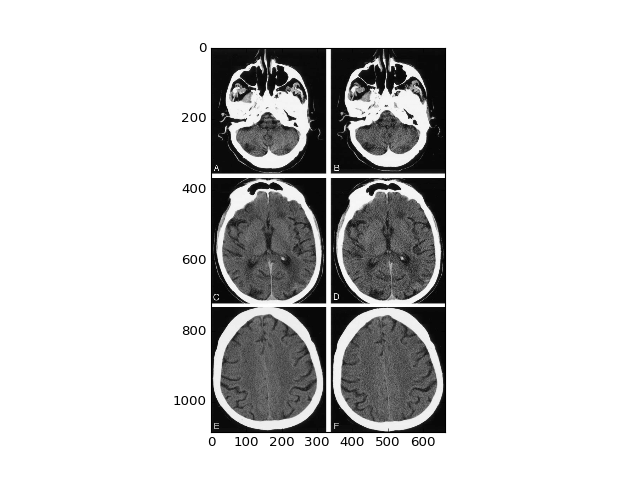

In [2]:
img = cv.imread('Imagens/image1.png')
print(img.shape)
fig = plt.figure()
ax = plt.axes()
ax.imshow(img, 'gray')

In [3]:
# Converting the image to grayscale.
imgG = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

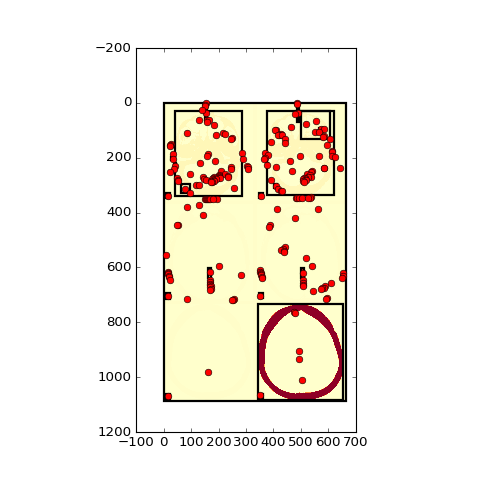

In [4]:
#Marcação (labeling)
# Threshold value is determined by
# using Otsu's method.
thresh = threshold_otsu(imgG)
# The pixels with intensity greater than
# "theshold" are kept.
imgLbl = imgG > thresh
# Labelling is performed on b.
imgLbl = label(imgLbl)
# On the labelled image c, regionprops is performed
reg = regionprops(imgLbl)
# the following command creates an empty plot of
# dimension 6 inch by 6 inch
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(6, 6))
# plots the label image on the
# previous plot using colormap
ax.imshow(imgLbl, cmap='YlOrRd')
for i in reg:
    # Printing the x and y values of the
    # centroid where centroid[1] is the x value
    # and centroid[0] is the y value.
    #print(i.centroid[1], i.centroid[0])
    # Plot a red circle at the centroid, ro stands
    # for red.
    plt.plot(i.centroid[1],i.centroid[0],'ro')
    # In the bounding box, (lr,lc) are the
    # co-ordinates of the lower left corner and
    # (ur,uc) are the co-ordinates
    # of the top right corner.
    lr, lc, ur, uc = i.bbox
    # The width and the height of the bounding box
    # is computed.
    rec_width = uc - lc
    rec_height = ur - lr
    # Rectangular boxes with
    # origin at (lr,lc) are drawn.
    rect = mpatches.Rectangle((lc, lr),rec_width,
           rec_height,fill=False,edgecolor='black',
           linewidth=2)
    # This adds the rectangular boxes to the plot.
    ax.add_patch(rect)

In [5]:
#Transformada Hough


(-0.5, 662.5, 1085.5, -0.5)

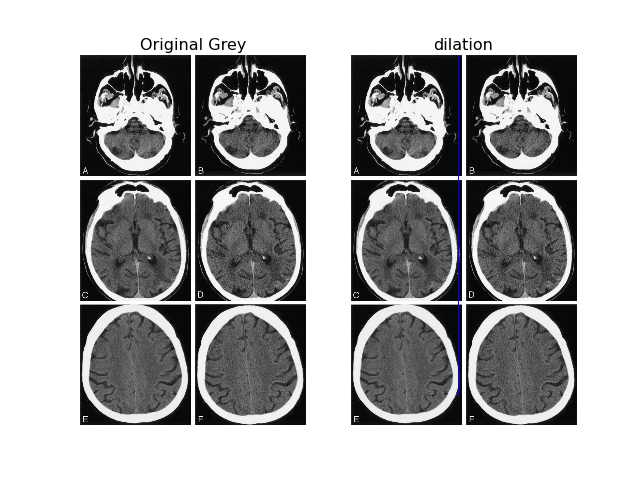

In [6]:
#Linha Hough
# Thresholding the image to obtain
# only foreground pixels.
thresh, imgHL = cv.threshold(imgG, 0, 255, 
                             cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
im = img.copy()
# Performing the Hough lines transform.
lines = cv.HoughLines(imgHL, 10, np.pi/20, 200)
for rho, theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(im,(x1,y1),(x2,y2),(0,0,255),2)
    
fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray')
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(im)
ax[1].set_title('dilation')
ax[1].axis('off')

(-0.5, 662.5, 1085.5, -0.5)

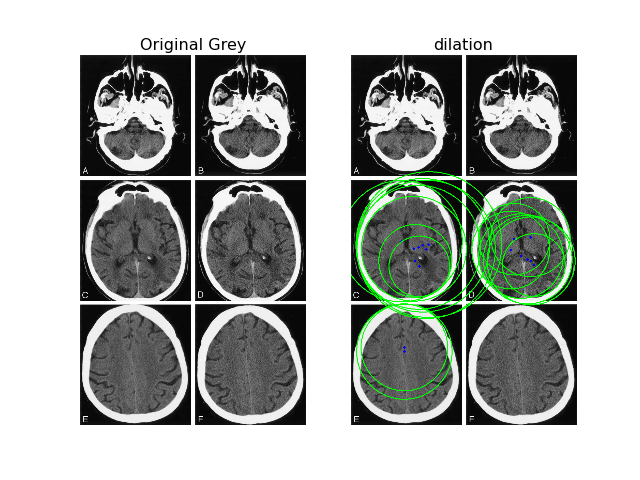

In [7]:
#Círculo Hough
# Median filter is performed on the
# image to remove noise.
im = snd.median_filter(imgG,size=5)
# Circles are determined using
# Hough circles transform.
circles = cv.HoughCircles(im, cv.HOUGH_GRADIENT,1,10)
# circles image is rounded to unsigned integer 16.
circles = np.uint16(np.around(circles))
# For each detected circle.
im = img.copy()
for i in circles[0,:]:
    # An outer circle is drawn for visualization.
    cv.circle(im,(i[0],i[1]),i[2],(0,255,0),2)
    # its center is marked
    cv.circle(im,(i[0],i[1]),2,(0,0,255),3)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray')
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(im)
ax[1].set_title('dilation')
ax[1].axis('off')

In [8]:
#Template Matching


(-100.0, 700.0, 1200.0, -200.0)

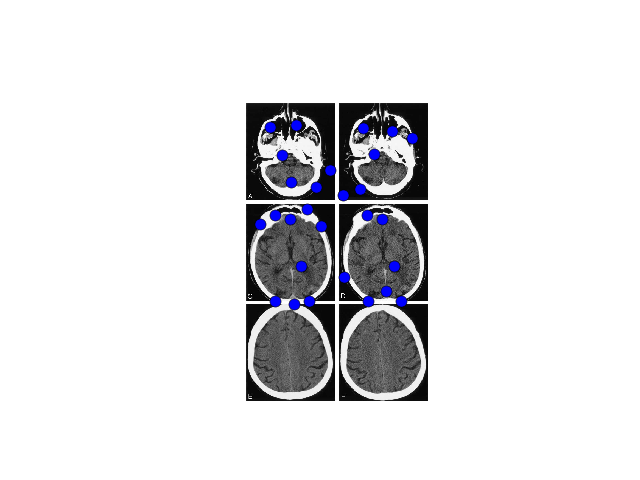

In [9]:
#Detector de canto
corner_response = corner_fast(imgG)
cpv = corner_peaks(corner_response, min_distance=50)
corners_subpix_val = corner_subpix(imgG, cpv, window_size=13)
fig, ax = plt.subplots()
ax.imshow(imgG, interpolation='nearest', cmap=plt.cm.gray)
x = corners_subpix_val[:, 1]
y = corners_subpix_val[:, 0]
ax.plot(x, y, 'ob', markersize=10)
ax.axis('off')

(-100.0, 700.0, 1200.0, -200.0)

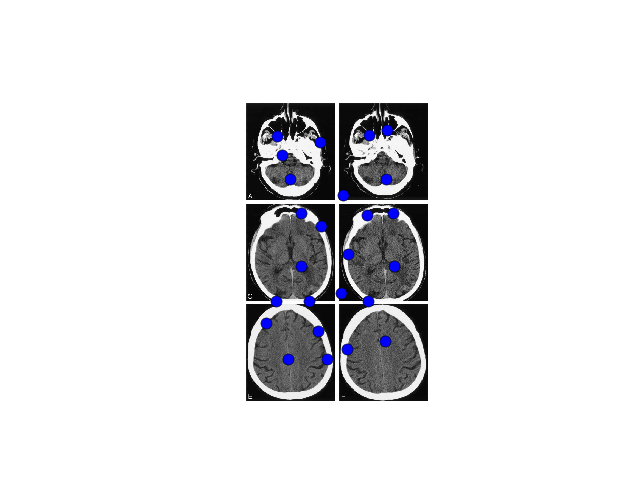

In [10]:
#Detector de Canto Harris
# Detecting corners using Harris.
corner_response = corner_harris(imgG, k=0.2)
# Detecting peak values.
corners_peak_val = corner_peaks(corner_response, 50)
corners_subpix_val = corner_subpix(imgG, corners_peak_val,13)
# Defining a subplot.
fig, ax = plt.subplots()
# Displaying the image.
ax.imshow(imgG, interpolation='nearest', cmap=plt.cm.gray)
x = corners_subpix_val[:, 1]
y = corners_subpix_val[:, 0]
ax.plot(x, y, 'ob', markersize=10)
ax.axis('off')